Nama: Alleluia Rehuellah Alefika Ndolu

NIM: 2602056334

# **Soal**
1) Membuat pemodelan dengan machine learning, dimana anda diminta untuk
melakukan semua proses pre-processing data yang dibutuhkan sebelum pemodelan klasifikasi.
Melakukan training machine learning dengan menbandingkan 2 algoritma Random Forest dan
Xgboost dan memilih algoritma terbaik yang akan anda simpan dalam format pickle. Pastikan
semua proses disertakan dalam file .ipynb termasuk classification report dari setiap model.

# **Data Preprocessing**

In [2]:
#Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

## Read the data

In [3]:
# Collecting data
df = pd.read_csv('data_D.csv')

In [4]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


## Understand the data

In [5]:
df.shape

(41259, 15)

In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41259.000000,41259.000000,4.125900e+04,41251.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,20629.000000,82171.693231,1.569221e+07,656.278733,38.060254,4.999127,55712.496615,1.554328,0.754405,0.496667,112308.502138,0.211324
std,11910.591715,47498.739183,7.137974e+04,80.062353,8.801094,2.802930,62858.019091,0.545629,0.430445,0.499995,50367.874510,0.408252
min,0.000000,3.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.500000,41098.500000,1.563347e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,20629.000000,81851.000000,1.569013e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,30943.500000,123064.500000,1.575714e+07,710.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,41258.000000,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


### Value counts for categorical data

In [9]:
df['Surname'].value_counts()

Surname
T'ien       597
Hsia        588
Hs?         416
Ts'ui       410
Kao         403
           ... 
Dawson        1
Lavarack      1
Bryan         1
Steigrad      1
Laurie        1
Name: count, Length: 2274, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     23520
Spain       9081
Germany     8658
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Male      23166
Female    18093
Name: count, dtype: int64

In [12]:
# Checking how many missing values found in each variable
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [13]:
# Using df.drop to drop irrelevant and variables that contains unique values
df = df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


## Value counts for numerical data

In [14]:
df['CreditScore'].value_counts()

CreditScore
850.0    671
678.0    576
684.0    422
705.0    417
667.0    402
        ... 
429.0      1
440.0      1
414.0      1
442.0      1
376.0      1
Name: count, Length: 442, dtype: int64

In [15]:
df['Age'].value_counts()

Age
35.0    2317
38.0    2317
37.0    2274
36.0    2227
34.0    2147
        ... 
79.0       4
92.0       4
80.0       3
82.0       1
83.0       1
Name: count, Length: 66, dtype: int64

In [16]:
df['Tenure'].value_counts()

Tenure
2     4588
4     4442
7     4431
5     4291
8     4232
3     4231
1     4177
9     4173
6     3970
10    1474
0     1250
Name: count, dtype: int64

In [17]:
df['NumOfProducts'].value_counts()

NumOfProducts
2    21132
1    19316
3      694
4      117
Name: count, dtype: int64

In [18]:
df['HasCrCard'].value_counts()

HasCrCard
1    31126
0    10133
Name: count, dtype: int64

In [19]:
df['IsActiveMember'].value_counts()

IsActiveMember
0    20767
1    20492
Name: count, dtype: int64

In [20]:
df['EstimatedSalary'].value_counts()

EstimatedSalary
88890.05     54
138526.96    26
141872.05    26
102908.91    25
120853.83    24
             ..
176932.42     1
153323.77     1
179863.20     1
68820.32      1
93882.93      1
Name: count, Length: 20995, dtype: int64

In [21]:
df['churn'].value_counts()

churn
0    32540
1     8719
Name: count, dtype: int64

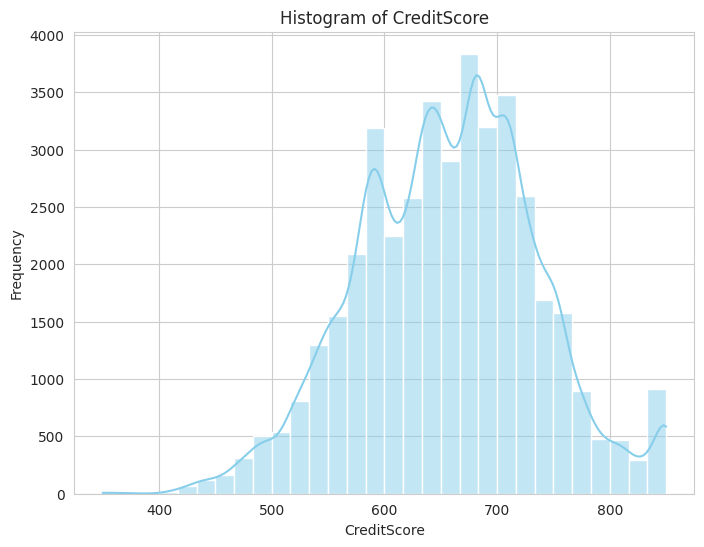

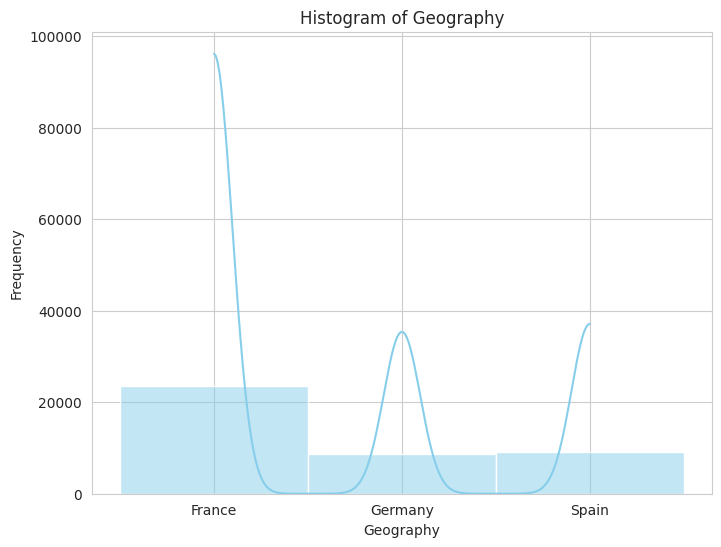

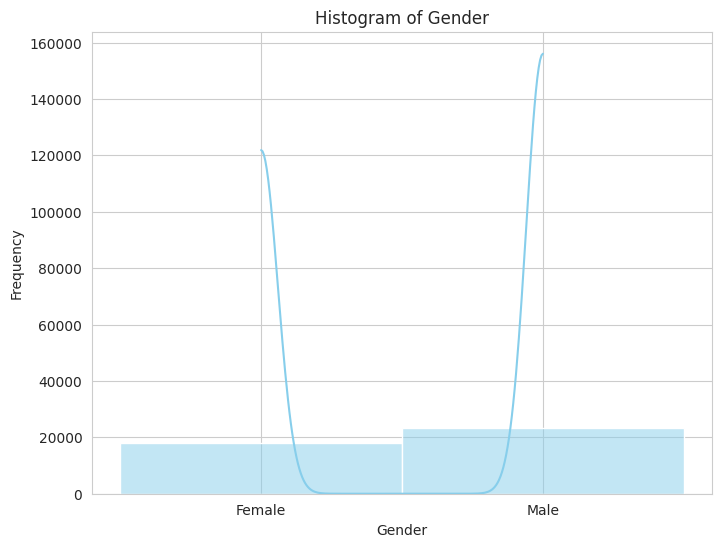

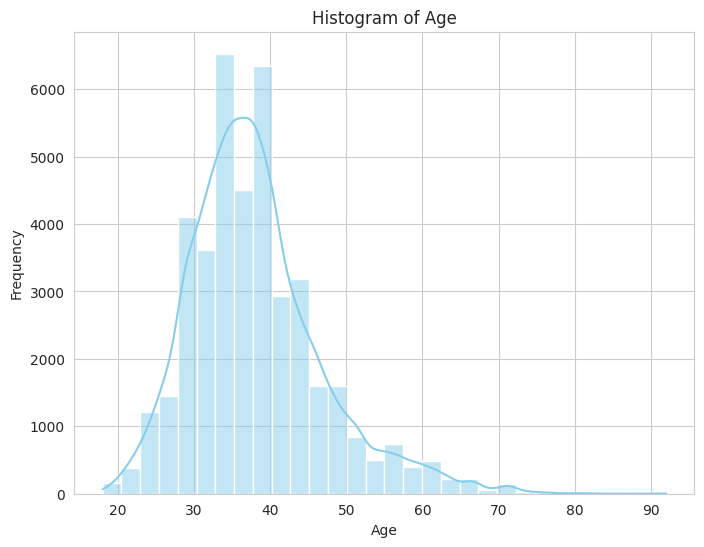

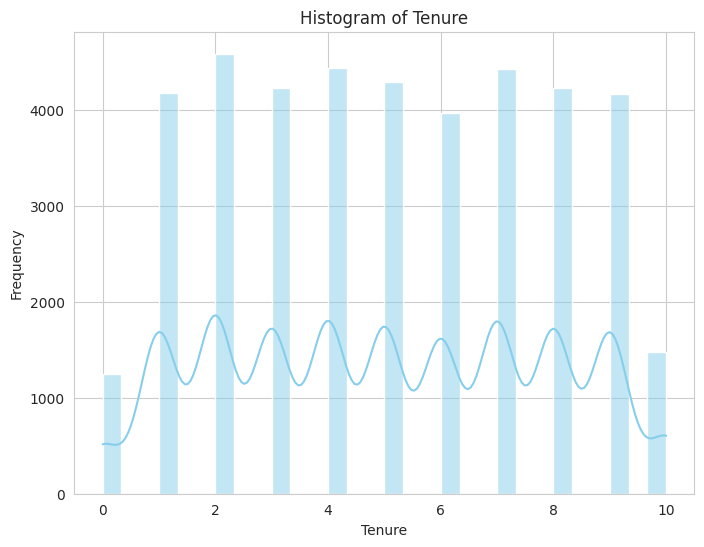

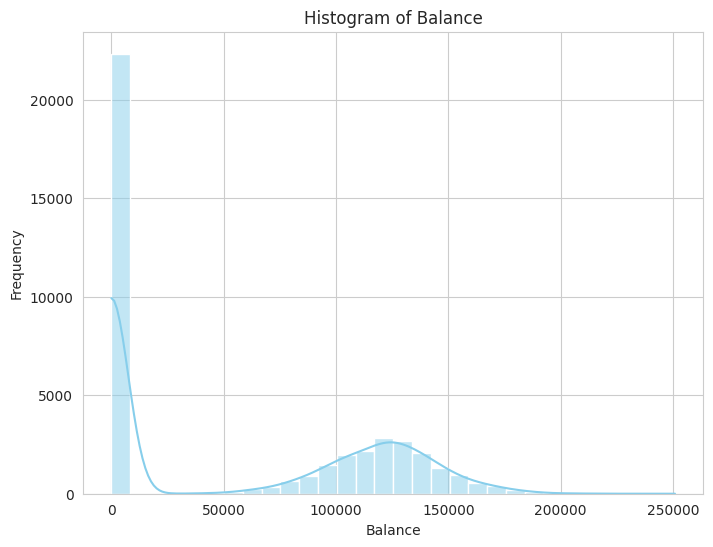

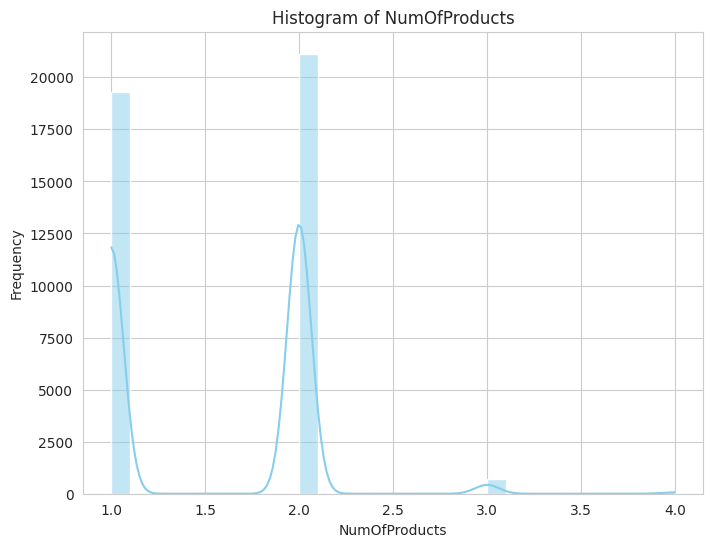

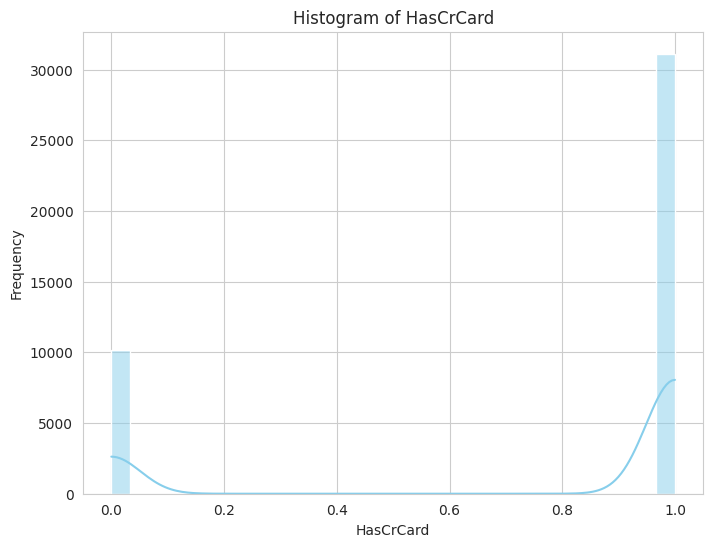

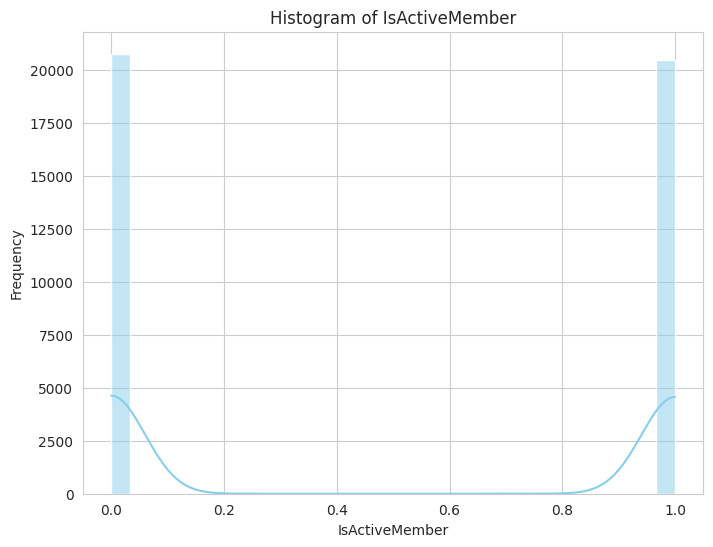

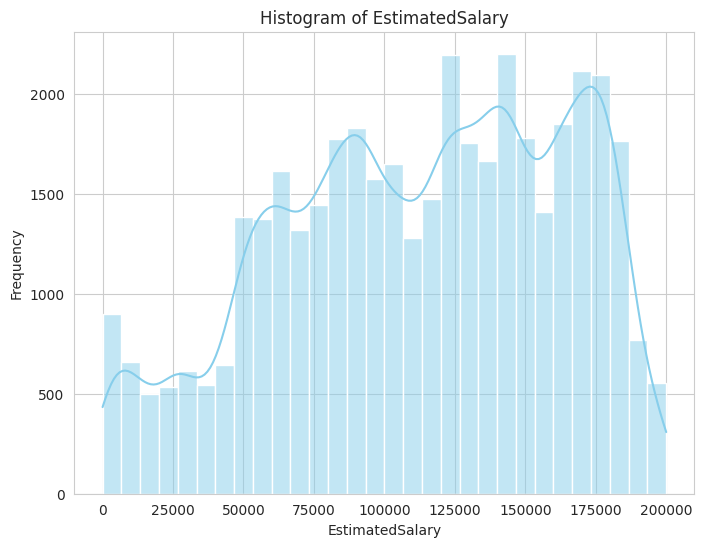

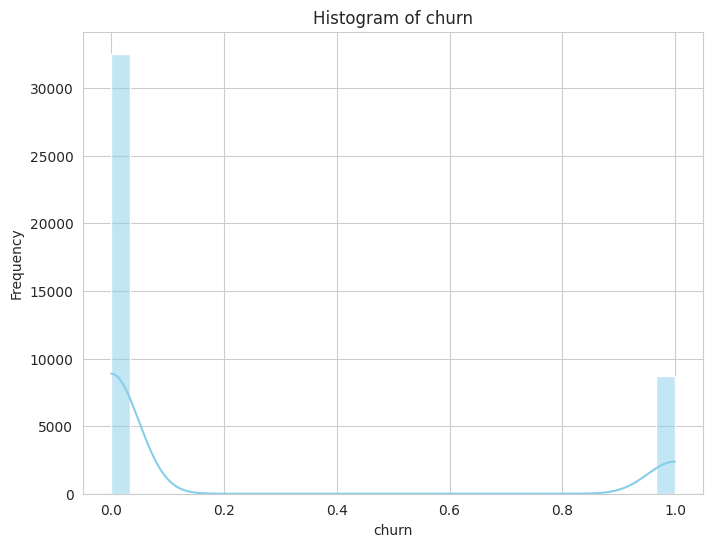

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataframe (df) here

# Set the style for the plots
sns.set_style("whitegrid")

# Iterate through each column in the dataframe
for col in df.columns:
    # Create a histogram for each column
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Split data

In [21]:
from sklearn.model_selection import train_test_split

input_df = df.drop('churn', axis = 1)
output_df = df['churn']

x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [22]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,708.0,France,Female,45.0,2,0.0,1,1,0,182076.97
6996,676.0,Spain,Male,35.0,7,0.0,2,1,0,166053.92
26510,645.0,France,Female,36.0,4,133980.8,1,1,1,112333.63
40020,791.0,Spain,Male,37.0,1,0.0,2,1,0,132973.17
17668,637.0,France,Female,48.0,7,0.0,2,1,1,146573.66


In [23]:
# Checking the shape of training set
x_train.shape

(33007, 10)

In [24]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,680.0,Spain,Female,32.0,2,0.00,2,0,1,38614.69
4280,605.0,France,Male,32.0,3,0.00,2,1,0,138051.19
36838,826.0,Germany,Female,39.0,8,113905.48,2,0,1,174043.40
39035,697.0,Spain,Male,44.0,3,0.00,1,1,1,143357.07
22201,550.0,Germany,Female,56.0,2,103391.38,1,1,0,90878.13


In [25]:
x_test.shape

(8252, 10)

## Handling Missing Values

In [26]:
x_train.isna().sum()

CreditScore        7
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

From here, we know that Credit Score has some missing values

Since the number of missing values is small, so we can try to handle the missing values by inputation


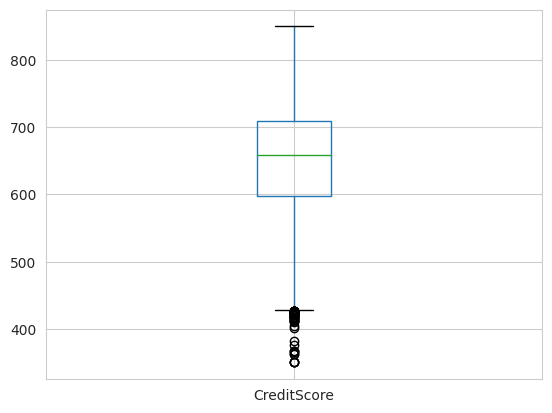

In [27]:
boxplot = x_train.boxplot(column = ['CreditScore'])

Because Credit Score has outliers, then we will fill the missing values with median

In [28]:
# Find the mean of Credit Score to impute missing value
median_credit_score = x_train['CreditScore'].median()
print("Median of Credit Score:", median_credit_score)

Median of Credit Score: 659.0


In [29]:
# Impute missing values
x_train['CreditScore'].fillna(median_credit_score, inplace = True)
x_test['CreditScore'].fillna(median_credit_score, inplace = True)

In [30]:
x_train.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [31]:
x_test.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

## FEATURE ENGINEERING

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
cat_cols = x_train.select_dtypes(include = 'object').columns
cat_cols

Index(['Geography', 'Gender'], dtype='object')

From above, we know now that Geography and Gender are categorical columns that we need to encode.

Since Geography has 3 values, we will use label encoding. However, for Gender, we will use binary encoding

### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
# labelEnc = LabelEncoder()

# cols = ['Geography']

# for col in cols:
#     labelEnc = LabelEncoder()
#     x_train[col] = labelEnc.fit_transform(x_train[col])
#     x_test[col] = labelEnc.fit_transform(x_test[col])

In [36]:
# For data training

# Initialize the LabelEncoder
labelEnc = LabelEncoder()

# Fit and transform the 'Country' column
x_train['Geography'] = labelEnc.fit_transform(x_train['Geography'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(labelEnc.classes_, labelEnc.transform(labelEnc.classes_)))

# Print the mapping
#print("Mapping of original labels to encoded values:")
print(label_mapping)

x_train.head()

{'France': 0, 'Germany': 1, 'Spain': 2}


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,708.0,0,Female,45.0,2,0.0,1,1,0,182076.97
6996,676.0,2,Male,35.0,7,0.0,2,1,0,166053.92
26510,645.0,0,Female,36.0,4,133980.8,1,1,1,112333.63
40020,791.0,2,Male,37.0,1,0.0,2,1,0,132973.17
17668,637.0,0,Female,48.0,7,0.0,2,1,1,146573.66


In [37]:
x_train['Geography'].value_counts().sort_index()

Geography
0    18877
1     6910
2     7220
Name: count, dtype: int64

In [38]:
# For data testing

# Initialize the LabelEncoder
labelEnc = LabelEncoder()

# Fit and transform the 'Country' column
x_test['Geography'] = labelEnc.fit_transform(x_test['Geography'])

# Get the mapping between original labels and encoded values
label_mapping = dict(zip(labelEnc.classes_, labelEnc.transform(labelEnc.classes_)))

# Print the mapping
#print("Mapping of original labels to encoded values:")
print(label_mapping)

x_test.head()

{'France': 0, 'Germany': 1, 'Spain': 2}


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,680.0,2,Female,32.0,2,0.00,2,0,1,38614.69
4280,605.0,0,Male,32.0,3,0.00,2,1,0,138051.19
36838,826.0,1,Female,39.0,8,113905.48,2,0,1,174043.40
39035,697.0,2,Male,44.0,3,0.00,1,1,1,143357.07
22201,550.0,1,Female,56.0,2,103391.38,1,1,0,90878.13


In [39]:
import pickle as pkl
filename_subs = 'label_encode.pkl'
pkl.dump(labelEnc, open(filename_subs, 'wb'))

In [40]:
x_test['Geography'].value_counts().sort_index()

Geography
0    4643
1    1748
2    1861
Name: count, dtype: int64

### Binary Encoding

In [41]:
x_train_encode = {"Gender": {"Male": 1, "Female": 0}}
x_train = x_train.replace(x_train_encode)
x_test = x_test.replace(x_train_encode)

In [42]:
x_train_encode

{'Gender': {'Male': 1, 'Female': 0}}

In [43]:
import pickle as pkl
filename = 'gender_encode.pkl'
pkl.dump(x_train_encode, open(filename, 'wb'))

In [44]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,708.0,0,0,45.0,2,0.0,1,1,0,182076.97
6996,676.0,2,1,35.0,7,0.0,2,1,0,166053.92
26510,645.0,0,0,36.0,4,133980.8,1,1,1,112333.63
40020,791.0,2,1,37.0,1,0.0,2,1,0,132973.17
17668,637.0,0,0,48.0,7,0.0,2,1,1,146573.66


In [45]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,680.0,2,0,32.0,2,0.00,2,0,1,38614.69
4280,605.0,0,1,32.0,3,0.00,2,1,0,138051.19
36838,826.0,1,0,39.0,8,113905.48,2,0,1,174043.40
39035,697.0,2,1,44.0,3,0.00,1,1,1,143357.07
22201,550.0,1,0,56.0,2,103391.38,1,1,0,90878.13


## SCALING

In [46]:
from sklearn.preprocessing import StandardScaler

In [48]:
# Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
x_train[cols] = sc.fit_transform(x_train[cols])
x_test[cols] = sc.fit_transform(x_test[cols])

In [50]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
23629,0.645310,0,0,0.789602,-1.072085,-0.886546,-1.014612,1,0,1.384287
6996,0.245562,2,1,-0.347769,0.715373,-0.886546,0.815904,1,0,1.066763
26510,-0.141694,0,0,-0.234032,-0.357102,1.244564,-1.014612,1,1,0.002202
40020,1.682157,2,1,-0.120294,-1.429577,-0.886546,0.815904,1,0,0.411210
17668,-0.241631,0,0,1.130813,0.715373,-0.886546,0.815904,1,1,0.680728


In [51]:
x_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
37555,0.299433,2,0,-0.687036,-1.061835,-0.885483,0.820489,0,1,-1.481244
4280,-0.637293,0,1,-0.687036,-0.707890,-0.885483,0.820489,1,0,0.508143
36838,2.122927,1,0,0.105178,1.061835,0.928006,0.820489,0,1,1.228225
39035,0.511758,2,1,0.671045,-0.707890,-0.885483,-1.021371,1,1,0.614296
22201,-1.324226,1,0,2.029126,-1.061835,0.760611,-1.021371,1,0,-0.435629


In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33007 entries, 23629 to 15795
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33007 non-null  float64
 1   Geography        33007 non-null  int64  
 2   Gender           33007 non-null  int64  
 3   Age              33007 non-null  float64
 4   Tenure           33007 non-null  float64
 5   Balance          33007 non-null  float64
 6   NumOfProducts    33007 non-null  float64
 7   HasCrCard        33007 non-null  int64  
 8   IsActiveMember   33007 non-null  int64  
 9   EstimatedSalary  33007 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


In [53]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8252 entries, 37555 to 28662
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      8252 non-null   float64
 1   Geography        8252 non-null   int64  
 2   Gender           8252 non-null   int64  
 3   Age              8252 non-null   float64
 4   Tenure           8252 non-null   float64
 5   Balance          8252 non-null   float64
 6   NumOfProducts    8252 non-null   float64
 7   HasCrCard        8252 non-null   int64  
 8   IsActiveMember   8252 non-null   int64  
 9   EstimatedSalary  8252 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 709.2 KB


In [54]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 33007 entries, 23629 to 15795
Series name: churn
Non-Null Count  Dtype
--------------  -----
33007 non-null  int64
dtypes: int64(1)
memory usage: 515.7 KB


In [55]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 8252 entries, 37555 to 28662
Series name: churn
Non-Null Count  Dtype
--------------  -----
8252 non-null   int64
dtypes: int64(1)
memory usage: 128.9 KB


# **MODELING**

## Model 1 : Random Forest

In [55]:
from sklearn.metrics import classification_report

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RF = RandomForestClassifier(criterion = 'gini', max_depth = 4, min_samples_leaf = 4)
RF.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=4)

In [59]:
y_predict_RF = RF.predict(x_test)

In [60]:
print("\nClassification Report Random Forest\n")
print(classification_report(y_test, y_predict_RF, target_names = ['0','1']))


Classification Report Random Forest

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6513
           1       0.81      0.36      0.50      1739

    accuracy                           0.85      8252
   macro avg       0.83      0.67      0.70      8252
weighted avg       0.84      0.85      0.82      8252



### Tuning Hyperparameter (Random Forest)

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
params_RF = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2 ,4]
}

In [63]:
RF2 = RandomForestClassifier()
RF2 = GridSearchCV(RF2,
                  param_grid = params_RF,
                  scoring = 'accuracy',
                  cv = 5)
RF2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [64]:
print("Tuned Hyperparameters Random Forest :", RF2.best_params_)
print("Accuracy :", RF2.best_score_)

Tuned Hyperparameters Random Forest : {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy : 0.8619685605730838


In [65]:
RF_tuned = RandomForestClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 4, min_samples_split = 2)
RF_tuned.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [66]:
y_predict_RF_tuned = RF_tuned.predict(x_test)

In [67]:
print("\nClassification Report Random Forest (tuned)\n")
print(classification_report(y_test, y_predict_RF_tuned, target_names = ['0','1']))


Classification Report Random Forest (tuned)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6513
           1       0.77      0.49      0.60      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.73      0.76      8252
weighted avg       0.85      0.86      0.85      8252



## Model 2 : XGBoost

In [68]:
from xgboost import XGBClassifier

In [69]:
# Initialize XGBoost classifier
# xgb_model = xgb.XGBClassifier(random_state=42)

xgb_model = XGBClassifier(gamma = 0.2, max_depth = 4, n_estimators = 50) #, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred2 = xgb_model.predict(x_test)

# Generate the classification report
report = classification_report(y_test, y_pred2, target_names = ['0','1'])

# Print the classification report
print("Classification Report for XGBoost Classifier:")
print(report)

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6513
           1       0.76      0.50      0.61      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.73      0.76      8252
weighted avg       0.85      0.86      0.85      8252



### Tuned XGBoost

In [70]:
param_grid = {
    'max_depth' : [2, 4, 6, 8],
    'n_estimators' : [50, 100, 200],
    'gamma' : [0, 0.1, 0.2]
}

In [71]:
XGB2 = XGBClassifier()
param_grid = {
    'n_estimators': [30, 50, 100],
    'max_depth': [2, 4, 6],
    'gamma' : [0, 0.1, 0.2],
    'learning_rate': [0.1, 0.01, 0.001]
}
XGB2 = GridSearchCV(XGB2, param_grid=param_grid, scoring='accuracy', cv=5)
XGB2.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [30, 50, 100]},
             scoring='accuracy')

In [72]:
print("Tuned Hyperparameters Random Forest :", XGB2.best_params_)
print("Accuracy :", XGB2.best_score_)

Tuned Hyperparameters Random Forest : {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Accuracy : 0.8632410353768931


In [73]:
xgb_tuned = XGBClassifier(gamma = 0, max_depth = 4, n_estimators = 100, learning_rate = 0.1) #, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model on the training data
xgb_tuned.fit(x_train, y_train)

# Make predictions on the test set
y_pred1 = xgb_tuned.predict(x_test)

# Generate the classification report
report = classification_report(y_test, y_pred1, target_names = ['0','1'])

# Print the classification report
print("Classification Report for XGBoost Classifier:")
print(report)

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6513
           1       0.77      0.51      0.61      1739

    accuracy                           0.86      8252
   macro avg       0.82      0.73      0.76      8252
weighted avg       0.86      0.86      0.85      8252



## **Conclusion**
1. Random forest:
Accuracy : 0.8619685605730838

2. XGBoost:
Accuracy : 0.8632410353768931

Between random forest and XGBoost, **XGBoost has achieved the highest accuracy.**

# Menyimpan model ke format pickle

In [74]:
import pickle as pkl

with open('XGBoost.pkl', 'wb') as file:
    pkl.dump(xgb_model, file)